# Aug 10th, 2022 (cos sim 8 x conds: 512)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
fig_dir = pjoin(fig_base_dir, 'paper2.0', '8x')
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

merge_thres = {
    128: 0.376,
    512: 0.444,
}
kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/8x

### Load results

In [3]:
results512 = np.load(pjoin(fig_dir, f'4x_n512.npy'), allow_pickle=True).item()
results128 = np.load(pjoin(fig_dir, f'4x_n128.npy'), allow_pickle=True).item()

In [4]:
reord = list(range(5)) + [6, 5, 7]
scores, std_err = {}, {}

for kk in [3, 7, 20]:
    scores[kk] = np.concatenate([
        results512['scores_dict'][kk],
        results128['scores_dict'][kk],
    ], axis=1)[:, reord, :]
    std_err[kk] = np.concatenate([
        results512['std_err_dict'][kk],
        results128['std_err_dict'][kk],
    ], axis=0)[reord]

In [5]:
{k: v.shape for k, v in scores.items()}

{3: (10, 8, 3), 7: (10, 8, 3), 20: (10, 8, 3)}

In [6]:
{k: v.shape for k, v in std_err.items()}

{3: (8, 3), 7: (8, 3), 20: (8, 3)}

In [7]:
pvalue = np.concatenate([
    results512['pvalue'],
    results128['pvalue'],
], axis=-1)
statistic = np.concatenate([
    results512['statistic'],
    results128['statistic'],
], axis=-1)
pvalue.shape, statistic.shape

((3, 8), (3, 8))

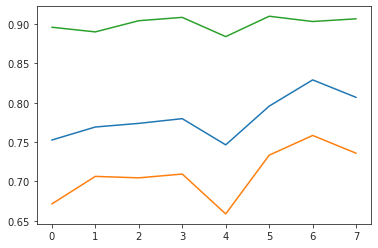

In [8]:
plt.plot(scores[7].mean(0));

In [9]:
conds = []
for i, j in itertools.combinations([BOLD, CAS, CAF], 2):
    conds.append((i, j))
conds

[
    ('BOLD', 'Ca$^{2\\!\\!+}_{slow}$'),
    ('BOLD', 'Ca$^{2\\!\\!+}_{fast}$'),
    ('Ca$^{2\\!\\!+}_{slow}$', 'Ca$^{2\\!\\!+}_{fast}$')
]

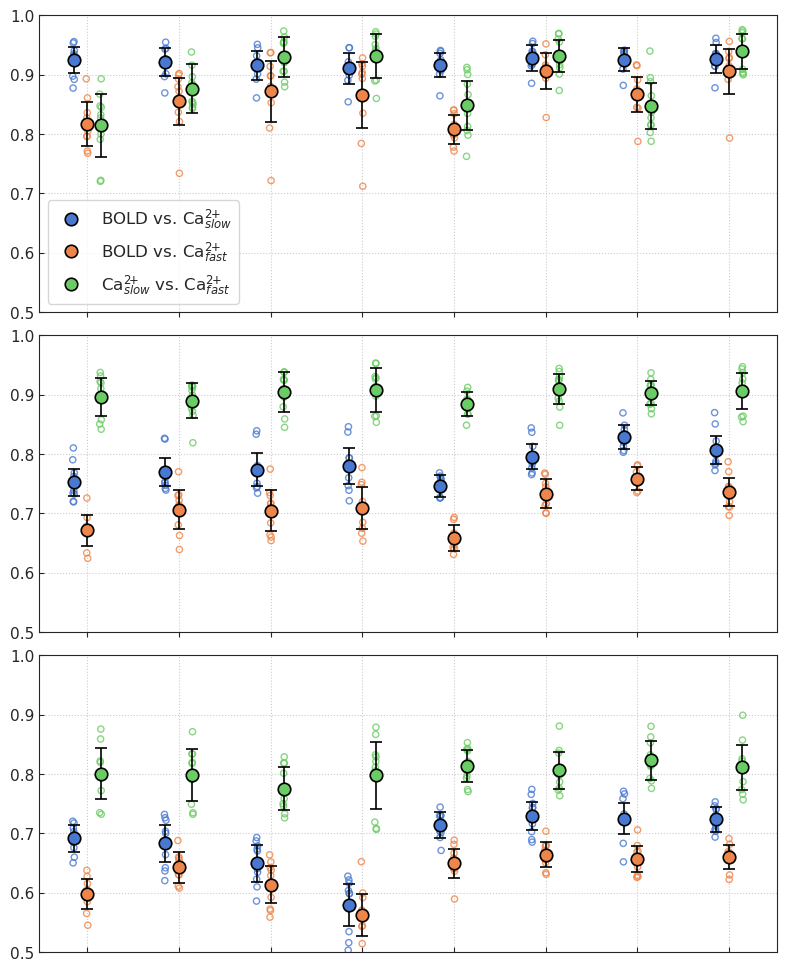

In [12]:
from figures.fig_ocs import similarity_point_all as go

fig, _ = go(scores, std_err, conds)
fig.savefig(pjoin(fig_dir, 'sim_all.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, 'sim_all.png'), **kws_fig)